In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import matplotlib
matplotlib.use('Agg')

### Compile similarity data from two files into one

In [3]:
df1 = pd.read_csv('C:\\Users\\aasth\\Documents\\Thesis_new\\Data\\turisimilarity2\\skelsimilarity.csv')
df2 = pd.read_csv('C:\\Users\\aasth\\Documents\\Thesis_new\\Data\\turisimilarity2\\all_imdists.csv')

In [4]:
for num in range(0, 500):
    newdf1 = df1.loc[df1['query_label'] == num, ['query_label', 'reference_label', 'distance', 'rank']]
    newdf2 = df2.loc[df1['query_label'] == num, ['reference_label', 'distance', 'rank']]
    newdf1 = newdf1.sort_values(by='reference_label', ascending=True)
    newdf2 = newdf2.sort_values(by='reference_label', ascending=True)
    newdf1['drawingdistance'] = newdf2['distance'].values
    newdf1['drawingrank'] = newdf2['rank'].values
    newdf1.to_csv('C:\\Users\\aasth\\Documents\\Thesis_new\\Data\\turisimilarity2\\im_vs_skel.csv', mode='a', header=False)

### Read compiled file and plot data

In [4]:
# for image vs drawing
# sim_df = pd.read_csv('C:\\Users\\aasth\\Documents\\Thesis_new\\Data\\turisimilarity2\\im_vs_drawing.csv', sep=',', 
#                   names=['query_label', 'reference_label', 'imagedistance', 'imagerank', 'drawingdistance', 'drawingrank'])
# sim_df.head()

# for image vs skeleton
sim_df = pd.read_csv('C:\\Users\\aasth\\Documents\\Thesis_new\\Data\\turisimilarity2\\im_vs_skel.csv', sep=',', 
                  names=['query_label', 'reference_label', 'imagedistance', 'imagerank', 'drawingdistance', 'drawingrank'])
sim_df.head()

,query_label,reference_label,imagedistance,imagerank,drawingdistance,drawingrank
0,0,0,6.743500e-07,1,0.000001,1
82,0,1,1.429610e+01,83,18.618000,25
93,0,2,1.475510e+01,94,1.447170,3
56,0,3,1.353400e+01,57,1.446940,2
85,0,4,1.452030e+01,86,6.885240,4


### Plot 4 types of distances

Text(0, 0.5, 'Object number')

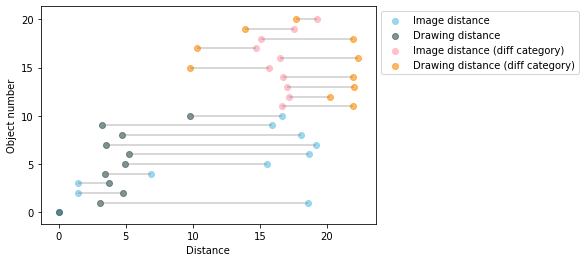

In [43]:
objectzero = sim_df.loc[(sim_df['query_label'] == 0) & (sim_df['reference_label'] < 11)]
objectone = sim_df.loc[(sim_df['query_label'] == 0) & (sim_df['reference_label'] > 10) & (sim_df['reference_label'] < 21)] # dist between object 0 and objects of other categories

imdists_same = objectzero['imagedistance']
sketchdists_same = objectzero['drawingdistance']
imdists_diff = objectone['imagedistance']
sketchdists_diff = objectone['drawingdistance']

group_same = objectzero['reference_label']
group_diff = objectone['reference_label']

plt.hlines(y=group_same, xmin=imdists_same, xmax=sketchdists_same, color='grey', alpha=0.4)
plt.scatter(imdists_same, group_same, color='skyblue', alpha=0.8, label='Image distance')
plt.scatter(sketchdists_same, group_same, color='darkslategrey', alpha=0.6 , label='Drawing distance')

plt.hlines(y=group_diff, xmin=imdists_diff, xmax=sketchdists_diff, color='grey', alpha=0.4)
plt.scatter(imdists_diff, group_diff, color='pink', alpha=1, label='Image distance (diff category)')
plt.scatter(sketchdists_diff, group_diff, color='darkorange', alpha=0.6 , label='Drawing distance (diff category)')
# pylab.legend(loc='best')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xlabel('Distance')
plt.ylabel('Object number')

## Normalize distances

In [5]:
norm_df = pd.DataFrame()
for num in range(0, 500):
    object_chosen = sim_df[sim_df['query_label'] == num]
    imagedist = object_chosen['imagedistance']
    drawingdist = object_chosen['drawingdistance']
    image_min = min(imagedist)
    image_max = max(imagedist)
    sketch_min = min(drawingdist)
    sketch_max = max(drawingdist)
    normdist_im = [(dist-image_min)/image_max for dist in imagedist]
    normdist_sketch = [(dist-sketch_min)/sketch_max for dist in drawingdist]
    data = {'query_label': object_chosen['query_label'], 'reference_label': object_chosen['reference_label'],
       'normdist_im': normdist_im, 'normdist_sketch': normdist_sketch}
    norm_df = norm_df.append(pd.DataFrame(data))

In [6]:
norm_df

,query_label,reference_label,normdist_im,normdist_sketch
0,0,0,0.000000,0.000000
82,0,1,0.603066,0.608987
93,0,2,0.622428,0.047336
56,0,3,0.570918,0.047329
85,0,4,0.612524,0.225213
...,...,...,...,...
249686,499,495,0.621287,0.657823
249658,499,496,0.607477,0.394529
249556,499,497,0.539806,0.506143
249544,499,498,0.526265,0.626777


Mean image distance = 0.75
\
Mean sketch distance = 0.645

#### Plot inter and intra category plots for all categories

In [7]:
import random

def newy_mid(n):
    list_1 = random.sample(range(0, n), 5) # sample 5 random numbers from below n
    list_2 = random.sample(range(n+10, 500), 5) # 5 random numbers from above n
    return list_1 + list_2

# diff_im = [] # (Inter-category im dist - intra-category im dist) for all categories
# diff_sk = [] # (Inter-category sketch dist - intra-category sk dist) for all categories
diff_3 = [] # Intra-category im dist - intra-category sk dist) for all categories
diff_4 = [] # Inter-category im dist - inter-category sk dist) for all categories

In [12]:
for n in range(0, 500, 10):
    plt.clf()
    object_number = n + random.randint(0,9)
    y = [n + foo for foo in range(0, 10)] # ref labels for same-category object

    if n >= 10 and n < 490:
        new_y = newy_mid(n)
    elif n < 10: # sample all numbers greater than n
        new_y = random.sample(range(10, 350), 10)
    elif n >= 490: # all numbers less than n
        new_y = random.sample(range(0, 340), 10)
    
    value1 = norm_df[norm_df['reference_label'].isin(y)].loc[norm_df['query_label'] == object_number, 'normdist_im'] # intra-category image distance
    value2 = norm_df[norm_df['reference_label'].isin(y)].loc[norm_df['query_label'] == object_number, 'normdist_sketch'] #intra-category sketch distance
    value3 = norm_df[norm_df['reference_label'].isin(new_y)].loc[norm_df['query_label'] == object_number, 'normdist_im'] #inter-category image distance
    value4 = norm_df[norm_df['reference_label'].isin(new_y)].loc[norm_df['query_label'] == object_number, 'normdist_sketch'] #inter-category sketch distance

#     print('Intra-category image distance', value1.mean())
#     print('Intra-category skeleton distance', value2.mean())
#     print('Inter-category image distance', value3.mean())
#     print('Inter-category skeleton distance', value4.mean())
#     print('\n\n')
    # plot distances
    
    fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))
    ax1.hlines(y=y, xmin=value1, xmax=value3, color='grey', alpha=0.4)
    ax1.scatter(value1, y, color='skyblue', alpha=0.8, label='intra-category image distance')
    ax1.scatter(value3, y, color='darkslategrey', alpha=0.6 , label='Inter-category image distance')
    ax2.hlines(y=y, xmin=value2, xmax=value4, color='grey', alpha=0.4)
    ax2.scatter(value2, y, color='pink', alpha=1 , label='Intra-category skeleton distance')
    ax2.scatter(value4, y, color='darkorange', alpha=0.6, label='Inter-category skeleton distance') 
    ax1.legend()
    ax2.legend()
    ax1.set_xlim(0, 1)
    ax2.set_xlim(0, 1)
    ax1.set_yticks([])
    ax2.set_yticks([])
    plt.xlabel('Distance')
    plt.ylabel('Object number')
    im_name = str(n) + '_imvsskel.png'
    plt.savefig(im_name)
    
    # means
#     mean_im = value3.mean() - value1.mean()
#     mean_sk = value4.mean() - value2.mean()
#     diff_intra = value1.mean() - value2.mean()
#     diff_inter = value3.mean() - value4.mean()
#     diff_im.append(mean_im)
#     diff_sk.append(mean_sk)
#     diff_3.append(diff_intra)
#     diff_4.append(diff_inter)
#     print('Inter-category im dist - intra-category im dist =', mean_im)
#     print('Inter-category sketch dist - intra-category sketch dist =', mean_sk)



C:\Users\aasth\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


In [20]:
# print(sum(diff_im) / len(diff_im))
# print(sum(diff_sk) / len(diff_sk))
print(sum(diff_3) / len(diff_3))
print(sum(diff_4) / len(diff_4))

0.20804243596852076
0.3543153249160017
0.06687536410443434
-0.07939752484304645
